# Linear Regression example
Using a sales data set, we will predict the sales, which is the target variable, based on the money spent on different advertisement platforms (TV, Radio, Newspaper) which comprises the features or independent variables.

# Imports and reading data

In [26]:
# imports 
import numpy as np
import pandas as pd

# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

# for visualisation
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt

# setting up plotly
init_notebook_mode(connected=True)  # for notebooks
from plotly.offline import iplot
# For offline use
cf.go_offline()

# for model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.api as sm

In [4]:
# loading dataset
df = pd.read_csv('advertising.csv')
df.shape
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Visualisation

In [31]:
df.iplot(kind='box')

<h3>Correlation matrix</h3>

Correlation is a statistical indicator that quantifies the degree to which two variables change in relation to each other. It indicates the strength and direction of the linear relationship between two variables. The correlation coefficient is denoted by “r”, and it ranges from -1 to 1.

In [6]:
# Heatmap of corrlation matrix

df_corr = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr(numeric_only=True) # Generate correlation matrix
print(df_corr)
trace = go.Heatmap(
    x = df_corr.columns,
    y = df_corr.index,
    z = np.array(df_corr),
    type = 'heatmap',
    colorscale = 'Viridis'
)
data = [trace]
fig = go.Figure(data = data)
iplot(fig)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


From the scatterplot and the heatmap, we can observe that ‘Sales’ and ‘TV’ have a higher correlation as compared to others because it shows a linear pattern in the scatterplot as well as giving 0.9 correlation.

# Train - test split
We first assign the feature variable, 'TV', during this case, to the variable 'X' and the response variable, 'Sales', to the variable 'y'.

In [12]:
X = df[['TV' ]]
y = df[['Sales']]

# splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

# checking shapes
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(140, 1)
(60, 1)
(140, 1)
(60, 1)


# Coding the model

In [14]:
reg = LinearRegression()
 
reg.fit(X_train, y_train)
print(reg.score(X_test, y_test))

0.7921031601245662


# Making predictions on test set

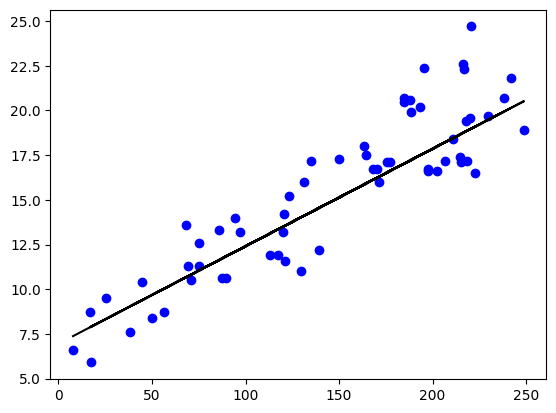

In [21]:
y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()
# Data scatter of predicted values

# Statistics

In [23]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.6480589869746525
MSE: 4.077556371826948
RMSE: 2.019296008966231


# Summary using statsmodels

In [27]:
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [28]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params

const    6.948683
TV       0.054546
dtype: float64

Here, 6.948 is the intercept, and 0.0545 is a slope for the variable TV

In [29]:
#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           1.52e-52
Time:                        15:57:05   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0